In [1]:
from sklearn.metrics import confusion_matrix
example_labels = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
example_preds  = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

cf = confusion_matrix(example_labels, example_preds)
cf

array([[2, 3],
       [2, 4]], dtype=int64)

One nice thing about using sklearn's implementation of a confusion matrix is that it automatically adjusts to the number of categories present in the labels. For example:

In [2]:
ex2_labels = [0, 1, 2, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0]
ex2_preds =  [0, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 0, 2, 0]

cf2 = confusion_matrix(ex2_labels, ex2_preds)
cf2

array([[2, 0, 1, 0],
       [0, 2, 1, 1],
       [0, 1, 3, 0],
       [1, 0, 0, 2]], dtype=int64)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

# Normalize the data
for col in df.columns:
    df[col] = (df[col] - min(df[col]))/ (max(df[col]) - min(df[col]))

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [4]:
y_hat_test

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [5]:
y_test.values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [6]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 39, 'TN': 24, 'FP': 9, 'FN': 4}

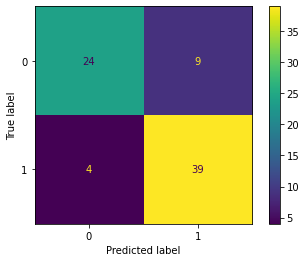

In [7]:
# Import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Visualize your confusion matrix
plot_confusion_matrix(model_log, X_test, y_test)

### Evaluating Logistic Regression Models - Lab

## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


In [14]:
def precision(y, y_hat):
    
    m = confusion_matrix(y, y_hat)
    tn = m[0][0]
    tp = m[1][1]
    
    fp = m[0][1]
    fn = m[1][0]
    
    return  tp/(tp+fp)

In [15]:
def recall(y, y_hat):
    m = confusion_matrix(y, y_hat)
    tn = m[0][0]
    tp = m[1][1]
    
    fp = m[0][1]
    fn = m[1][0]
    
    return  tp/(tp+fn)

In [16]:
def accuracy(y, y_hat):
    m = confusion_matrix(y, y_hat)
    tn = m[0][0]
    tp = m[1][1]
    
    fp = m[0][1]
    fn = m[1][0]
    
    return  (tp+tn)/len(y)

In [17]:
def f1_score(y, y_hat):
    numer = precision(y, y_hat)*recall(y, y_hat)
    denum = precision(y, y_hat)+recall(y, y_hat)
    f= numer/denum
    return 2*f

In [18]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8396946564885496
Testing Precision:  0.8125



Training Recall:  0.9016393442622951
Testing Recall:  0.9069767441860465



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8289473684210527



Training F1-Score:  0.8695652173913043
Testing F1-Score:  0.8571428571428572


In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8396946564885496
Testing Precision:  0.8125



Training Recall:  0.9016393442622951
Testing Recall:  0.9069767441860465



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8289473684210527



Training F1-Score:  0.8695652173913043
Testing F1-Score:  0.8571428571428572


### Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
    
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))


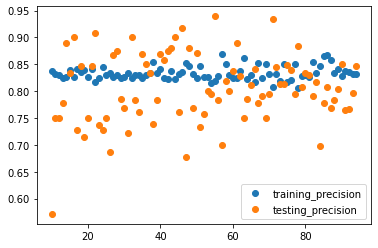

In [22]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

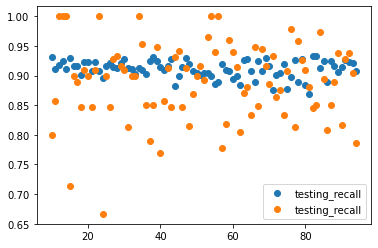

In [30]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='testing_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

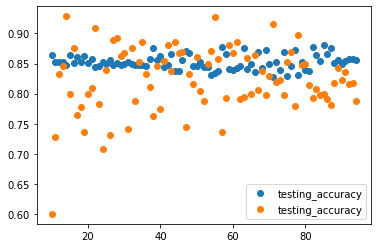

In [29]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='testing_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

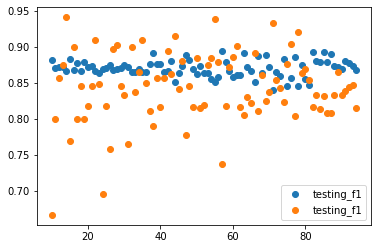

In [32]:
# Train and test f1
plt.scatter(list(range(10, 95)), training_f1, label='testing_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()